# Bank Customer Churn Segmentation
Dataset source: https://www.kaggle.com/shrutimechlearn/churn-modelling

Most valuable customers is a marketing term referring to the customers who are the most profitable for a company. These customers buy more or higher-value products than the average customer. The companies can provide these customers with advice and guidance to make them loyal.

Many businesses use the practice of retaining valuable customers in order to increase financial performance as well as their customer base. The research done by Gartner shows that the 80% of company's profit come from 20% of existing (loyal) customers.This happens because the customers are inclined to come back for company's product/service if they had a good experience with them before. Also if the customers were rewarded with discounts for a long-term relationship with a company, they are willing to buy more of company's products/services.

Valuable customers is also a good marketing aspect for the company. Customers that are staying with a company for long terms are more inclined to share their experience of a business, with their friends, which will work better than expensive advertising because people tend to be more affected by people they are familiar with. This marketing move will strengthen you brand in the minds of people who are unfamiliar with it.

Regular loyal customers can be the key to success aspect in the highly competitive market. If the company builds a strong brand image, which helps to retain valuable customers, then it can make it resistant to competitive forces.

**Here we will do clustering to find valuable customer that tend to churn. We have to give them special attention because they bring a lot of benefits to the company**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

/Users/shabrinaazaloa/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [4]:
df_exited = df[df['Exited']==1]

In [5]:
df_exited.shape

(2037, 11)

## Clustering Using KMeans

In [6]:
k = range(1, 15)
inertia = []

for i in k:
    model = KMeans(n_clusters = i)
    model.fit(df_exited[['Balance','EstimatedSalary']])
    inertia.append(model.inertia_)

Text(4, 50, 'Best k value = 4')

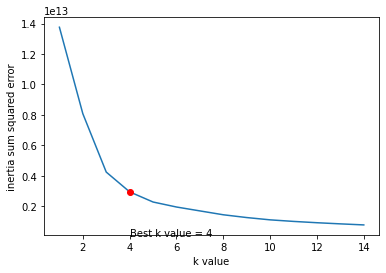

In [7]:
plt.plot(k, inertia) 
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.plot(k[3], inertia[3], 'ro')
plt.annotate(
    'Best k value = 4', xy=(k[3], inertia[3]),
    xytext = (4, 50)
)

In [8]:
model_KM = KMeans(n_clusters = 4, max_iter = 1000000) 
model_KM.fit(df_exited[['Balance','EstimatedSalary']])

KMeans(max_iter=1000000, n_clusters=4)

In [9]:
df_exited['cluster'] = model_KM.predict(df_exited[['Balance','EstimatedSalary']])
df_exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,cluster
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,2
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,1


In [10]:
model_KM.cluster_centers_

array([[  4912.93313167,  53424.5541637 ],
       [123663.77993084,  49396.74947441],
       [123442.89215608, 150253.48964286],
       [  5327.87386282, 152952.33707581]])

## ESTIMATED SALARY & BALANCE

When a person deposits money into their bank account, the bank can then lend other people that money. The depositing customer gains a small amount of money in return (interest on deposits), and the lending customer pays a larger amount of money to the bank in return (interest on loans).That's why customer with high balance is the most valuable customer for bank. High balance with high salary absolutely better.

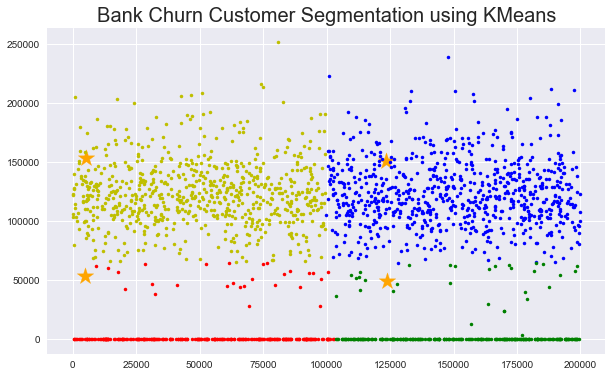

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.scatter(
    model_KM.cluster_centers_[:, 0],
    model_KM.cluster_centers_[:, 1],
    color = 'orange', marker = '*', s = 300
)
plt.plot(df_exited['EstimatedSalary'][df_exited['cluster'] == 0], df_exited['Balance'][df_exited['cluster'] == 0], 'r.')
plt.plot(df_exited['EstimatedSalary'][df_exited['cluster'] == 1], df_exited['Balance'][df_exited['cluster'] == 1], 'y.')
plt.plot(df_exited['EstimatedSalary'][df_exited['cluster'] == 2], df_exited['Balance'][df_exited['cluster'] == 2], 'b.')
plt.plot(df_exited['EstimatedSalary'][df_exited['cluster'] == 3], df_exited['Balance'][df_exited['cluster'] == 3], 'g.')
plt.grid(True)
plt.title("Bank Churn Customer Segmentation using KMeans", size=20)
plt.show()

**From clustering above, most valuable customer is cluster 1. They are customer that has high salary and high balance.**

Text(0.5, 1.0, 'Bank Customer in Cluster 3')

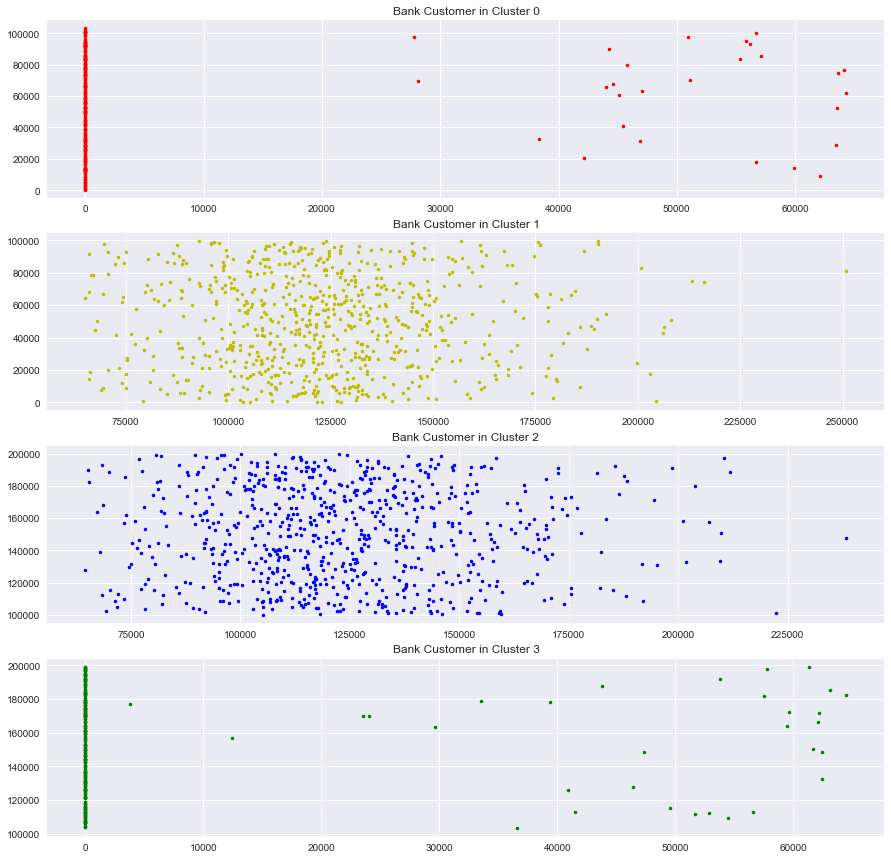

In [12]:
plt.figure(figsize=(15, 15))
plt.subplot(411)
plt.plot(df_exited['Balance'][df_exited['cluster'] == 0], df_exited['EstimatedSalary'][df_exited['cluster'] == 0], 'r.')
plt.title('Bank Customer in Cluster 0')
plt.subplot(412)
plt.plot(df_exited['Balance'][df_exited['cluster'] == 1], df_exited['EstimatedSalary'][df_exited['cluster'] == 1], 'y.')
plt.title('Bank Customer in Cluster 1')
plt.subplot(413)
plt.plot(df_exited['Balance'][df_exited['cluster'] == 2], df_exited['EstimatedSalary'][df_exited['cluster'] == 2], 'b.')
plt.title('Bank Customer in Cluster 2')
plt.subplot(414)
plt.plot(df_exited['Balance'][df_exited['cluster'] == 3], df_exited['EstimatedSalary'][df_exited['cluster'] == 3], 'g.')
plt.title('Bank Customer in Cluster 3')

In [13]:
df_cluster_0 = df_exited[df_exited['cluster'] == 0]
df_cluster_1 = df_exited[df_exited['cluster'] == 1]
df_cluster_2 = df_exited[df_exited['cluster'] == 2]
df_cluster_3 = df_exited[df_exited['cluster'] == 3]

## Cluster 1 Exploration

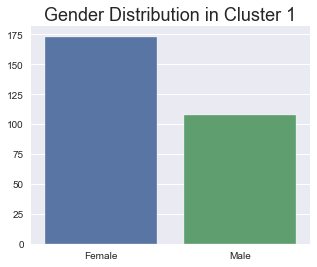

In [14]:
genders = df_cluster_0['Gender'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution in Cluster 1", size=18)
plt.show()

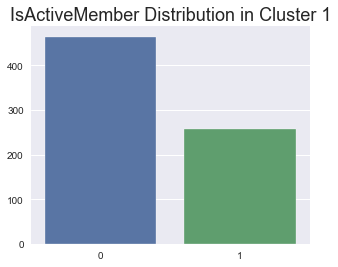

In [15]:
active = df_cluster_1['IsActiveMember'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=active.index, y=active.values)
plt.title("IsActiveMember Distribution in Cluster 1", size=18)
plt.show()

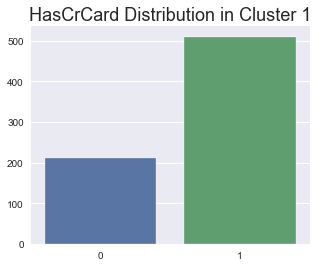

In [16]:
credit = df_cluster_1['HasCrCard'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=credit.index, y=credit.values)
plt.title("HasCrCard Distribution in Cluster 1", size=18)
plt.show()

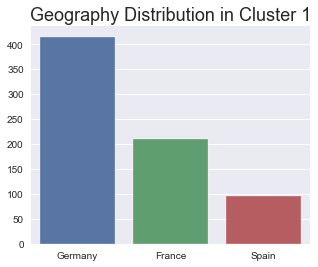

In [17]:
geo = df_cluster_1['Geography'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=geo.index, y=geo.values)
plt.title("Geography Distribution in Cluster 1", size=18)
plt.show()

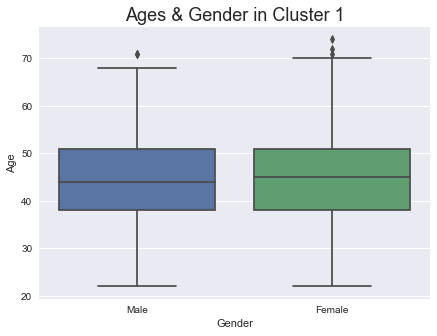

In [18]:
plt.figure(figsize=(7,5))
plt.title("Ages & Gender in Cluster 1", size=18)
sns.axes_style("dark")
ax = sns.boxplot(x="Gender", y="Age", data=df_cluster_1)
plt.show()